<a href="https://colab.research.google.com/github/sanjana19991118/python_ml/blob/main/Lab_3_1_Explore_various_data_quality_issues_that_can_be_present_in_a_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Explore various data quality issues that can be present in a dataset
#
# Data quality is said to be satisfied when the requirements of an analysis
# are fulfilled.
#
# Bad data quality -> Bad results for data mining
#
# This is often done via exploring and summarizing the dataset in various ways
# combined with domain knowledge to ensure that the dataset is correctly
# pre-processed before we are able to perform the required analysis on it.
#
# This lab attempts to discover various data quality problems such as:
#
# 1. General data quality problems
#    a. Missing or incomplete data
#    b. Disguised null/non-null values
#    c. Finding potentially inaccurate values
#    d. Finding duplicate rows
#
# 2. Domain-specific data quality problems
#    a. Binary attributes being treated as nominal
#    b. Ordinal attribute being treated as nominal
#    c. Too many classes for single attribute

In [ ]:
# Download the dataset file to local storage to current directory (from publicly
# shared drive file)
#
#Original source:
#https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
!gdown 1Yhw8tBCmjYrDZ5Rm1xPrP2y5bmBmxoEP

Downloading...
From: https://drive.google.com/uc?id=1Yhw8tBCmjYrDZ5Rm1xPrP2y5bmBmxoEP
To: /content/housing.csv
100% 461k/461k [00:00<00:00, 93.6MB/s]


In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
print(dir(pd))
print(pd.merge)

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_is_numpy_dev', '_libs', '_pandas_datetime_CAPI', '_pandas_parser_CAPI', '_testing', '_typing', '_version_meson', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'conca

In [ ]:
# Load the dataset file into memory
DATASET_PATH = "./housing.csv"
df = pd.read_csv(DATASET_PATH)

print(df['CentralAir'])
df

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: CentralAir, Length: 1460, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
# 1. General data quality problems

In [ ]:
# a. Missing or incomplete data

In [ ]:
null_bool_df = df.isnull()
print(null_bool_df)
null_value_counts = null_bool_df.sum()
print(null_value_counts )

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

In [ ]:
# isnull() returns a dataframe of the same shape and labels as the original
# with null values mapped to False and others mapped to true
null_bool_df = df.isnull()
# We wish to know the number of null values in each column, therefore
# we'll aggregate these values with the help of sum functionj
null_value_counts = null_bool_df.sum()

# Instead of manually going through each column, it would be more practical
# to sort the dataframe as per the number of data columns on priority basis
null_value_counts_sorted = null_value_counts.sort_values(ascending=False)
print(null_value_counts_sorted.to_string())

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageFinish       81
GarageType         81
GarageYrBlt        81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Condition2          0
BldgType            0
Neighborhood        0
LandSlope           0
LotConfig           0
Condition1          0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSSubClass          0
MSZoning            0
Id                  0
Utilities           0
HouseStyle          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodA

In [ ]:
# The date/year columns such as "Garage Year Built" can have invalid values such
# as 0 or null, implying that there's no information available about the same or
# the garage isn't available for those rows, both of which would be needed to be
# handled differently for analysis
print(df['GarageYrBlt'].isna().sum())

81


In [ ]:
# b. Disguised null/non-null values
#
# There can be cases where certain columns would have non-null value
# essentially representing non-null values, which makes it important to review
# the unique values especially in the cases of object/string columns
#
# Numeric columns can too have them in cases, for e.g. -1/0 where it won't
# be present

# Displaying values with object/string column
object_column_names = df.select_dtypes(include=['object']).columns
for column_name in object_column_names:
  print(f"Unique values in column '{column_name}':", df[column_name].dropna().unique())

Unique values in column 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column 'Street': ['Pave' 'Grvl']
Unique values in column 'Alley': ['Grvl' 'Pave']
Unique values in column 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in column 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in column 'Utilities': ['AllPub' 'NoSeWa']
Unique values in column 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in column 'LandSlope': ['Gtl' 'Mod' 'Sev']
Unique values in column 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values in column 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values in column 'Condition2': ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values in colum

In [ ]:
# c. Finding potentially inaccurate values

# The GarageYrBlt may have invalid values (although its normal in the context
# of the dataset we have considered)
MIN_ACCEPTABLE_YEAR = 1960
MAX_ACCEPTABLE_YEAR = 2020

# Displaying houses that are not within the above bounds (if the value is found
# to be invalid it can be dropped)
df["GarageYrBlt"].dropna()[(df["GarageYrBlt"] > MAX_ACCEPTABLE_YEAR)
| (df["GarageYrBlt"] < MIN_ACCEPTABLE_YEAR)]

,GarageYrBlt
8,1931.0
9,1939.0
19,1958.0
21,1930.0
28,1957.0
...,...
1438,1957.0
1443,1916.0
1448,1950.0
1457,1941.0


In [ ]:
# d. Finding duplicate rows
#
# (Since our dataset doesn't have it, we'll be manually introducing them to see
# how duplicate )

In [ ]:
# Manually duplicating the first row 10 times

## Make a copy of the original data frame
dup_df = df.copy()

## Create a new dataframe in each iteration with a duplicate row from index
## 0 to 9
for i in range(10): dup_df = pd.concat([dup_df, df.loc[[i]]])

# Displaying duplicate rows

## Retrieve duplicate rows using
duplicate_row_indices = dup_df.duplicated()
print(duplicate_row_indices)
duplicate_rows = dup_df[duplicate_row_indices]
duplicate_rows

0    False
1    False
2    False
3    False
4    False
     ...  
5     True
6     True
7     True
8     True
9     True
Length: 1470, dtype: bool


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
# Detecting outliers in dataset using visualization
outlier_detection_data = df["SalePrice"]

In [ ]:
# We'll be performing outlier detection on the "SalePrice" column via
# boxplot

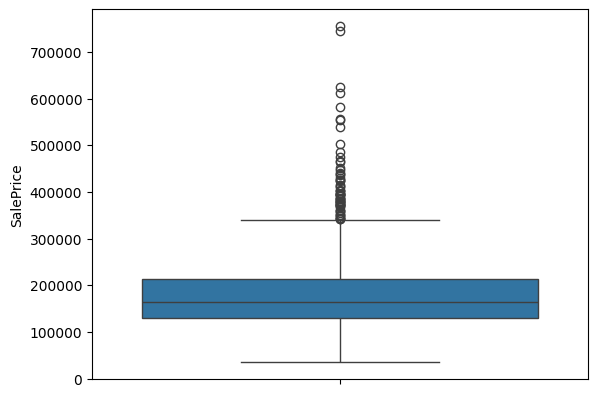

In [ ]:
# Let's try plotting a box plot to visualize the outliers in the SalePrice
# The black circles in the below plot represent the outliers in the given column
sns.boxplot(outlier_detection_data)
pass


In [ ]:
# 2. Domain-specific data quality issues
#
# Data quality is said to be achieved when the requirements of the analysis are
# satisfied.
#
# Some scenario-specific examples for the same are as follows:

In [ ]:
# a. Binary attributes being treated as nominal
#
# 'CentralAir' despite being a binary attribute is represented using object or
# category like data
#
# If a model/algorithm being used for analysis cannot handle this, it could be
# considered as a data quality issue

# Displaying the current values
print("Original unique values", df['CentralAir'].unique())

# Transforming and storing the values
df["CentralAirBinary"] = df['CentralAir'].map(lambda x: x == 'Y')

# Displaying the values post successful mapping
print("Mapped unique values:", df["CentralAirBinary"].unique())

Original unique values ['Y' 'N']
Mapped unique values: [ True False]


In [ ]:
# b. Ordinal attributes being treated as nominal
#
# A lot of the attributes that are present as categorical/object data type
# are actually ordinal in nature, i.e. their unique values represent a certain
# order. Replacing them with standard/weighted ranks or numbers can improve
# the overall quality and accuracy of your model/output of algorithm
#
# There are terms like Fa/TA/Gd/Ex which only imply ratings like
#
# Fa -> Fair
# TA -> Typical/Average
# Gd -> Good
# Ex -> Excellent
# Po -> Poor
#
# Having standard/weighted rankings based on the understanding can prove to be
# better than other options out
#
# Generally: Poor (Po) < Fair (Fa) < Typical/Average (TA) < Good (Gd) < Excellent (Ex)
#
# Examples of such cases in our dataset include:
#
print(df["ExterCond"].unique())
print(df["ExterQual"].unique())
print(df["BsmtQual"].unique())

['TA' 'Gd' 'Fa' 'Po' 'Ex']
['Gd' 'TA' 'Ex' 'Fa']
['Gd' 'TA' 'Ex' nan 'Fa']


In [ ]:
# c. Too many classes for a single attribute
#
# This can be a problem at times as it could lead to overlooking of class
# imbalance which would be need to be dealt in the pre-processing phase
#
# Generally pre-processing the classes in such an attribute for analysis
# is better in such cases.
#
# An example of this in the dataset includes:
#
df["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

data quality issue where a single attribute (a column in your dataset) has a large number of unique categories or 'classes'.

Here's a breakdown of why this can be a problem and what it means:

Too many classes: Imagine a column like 'City' which could have hundreds or thousands of unique city names. This is what 'too many classes' refers to.

Class Imbalance: With many classes, it's very likely that some classes will have many data points, while others will have very few. This is called 'class imbalance'. For example, if you have 1000 cities, some major cities might have thousands of entries, while smaller towns might only have one or two.

Problem in Pre-processing: Many machine learning algorithms struggle with a high number of unique categories, especially if some are rare. It can lead to:

Increased complexity: More categories mean more features if you use techniques like one-hot encoding, which can make your model slower and harder to train.
Poor model performance: Models might not learn effectively from categories with very few examples.
Overfitting: The model might memorize the rare categories rather than learning general patterns.
Solution: Pre-processing: To address this, you often need to 'pre-process' this attribute. This could involve:

Grouping/Binning: Combining similar or rare categories into broader groups (e.g., grouping all cities in a certain region as 'Other Region').
Feature Hashing: Transforming high-cardinality categorical features into a lower-dimensional space.
Encoding Techniques: Using more advanced encoding methods that handle high cardinality better than simple one-hot encoding.
Dropping the attribute: If the attribute doesn't provide significant value despite its many classes, you might consider dropping it.
The example df["Neighborhood"].unique() is used to show a column that indeed has many unique values, illustrating this concept in your dataset.